# importing dependencies

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# collecting data

In [110]:
df = pd.read_csv('zomato.csv', encoding='latin-1')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [111]:
df.shape

(9551, 21)

In [112]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## In data analysis we try to do the following...
1. Find Missing values
2. Explore about numerical variables
3. Explore about categorical values
4. Finding relationship between features

In [114]:
df.isnull().sum()
# here in cuisine we have 9 missing values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [115]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head(2)

,Country Code,Country
0,1,India
1,14,Australia


In [116]:
final_df = pd.merge(df, df_country, on = 'Country Code', how = 'left')
# here we are merging the 2 dataframes, df and df_country.
# to do this we are first keeping "df" on the left side and "df_country" on the right side.
# next we use the "on" parameter to match the column on which we want to combine(Here it is country Code)
# the "how" helps us to focus on the datset of our choice. (In this case, its the left dataframe)

In [117]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [118]:
final_df.dtypes
# this tells us the data types of each column

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

## Observations on the Dataset are as follows...
1. From the PIE CHART we can tell that India has the largest amount of records, next is United States and then United Kingdoms.
2. From the groupby function(ratings) we can see that maximum number of people have not given a rating at all. We can also see various rating measures and their colors.
    1. 4.9-4.5 ---> Excellent (Dark Green)
    2. 4.4-4.0 ---> Very Good (Green)
    3. 3.9-3.5 ---> Good (Yellow)
    4. 3.4-2.5 ---> Average (Orange)
    5. 2.4-1.8 ---> Poor (Red)
3. From the BARPLOT we can tell that the number of "not rated" is very high and the maximum number of ratings are between 2.8 - 4.0.
4. Maximum number of 0.0 ratings are from India.
5. Online deliveries are available only in India and UAE.

In [119]:
# we try to find the number of country and their records
final_df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [120]:
country_names = final_df['Country'].value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [121]:
country_values = final_df['Country'].value_counts().values
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x143b196a080>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

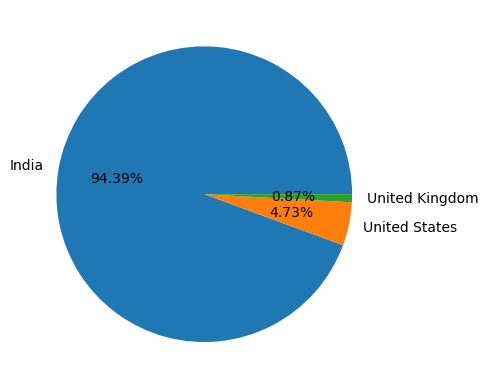

In [122]:
# now we plot a pie chart to understand which country has the maximum records
plt.pie(country_values[:3], labels = country_names[:3], autopct = '%1.2f%%')

In [123]:
# we now try to work on the Aggregate rating
# We try to understand all about the rating and all its properties
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns = {0:'Rating count'})
ratings.head()

# here we have done groupby to bring all the aggregate rating, rating color and rating text into one single dataframe
# We have renamed the rating count column which shows us the number of aggregate ratings made. 

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

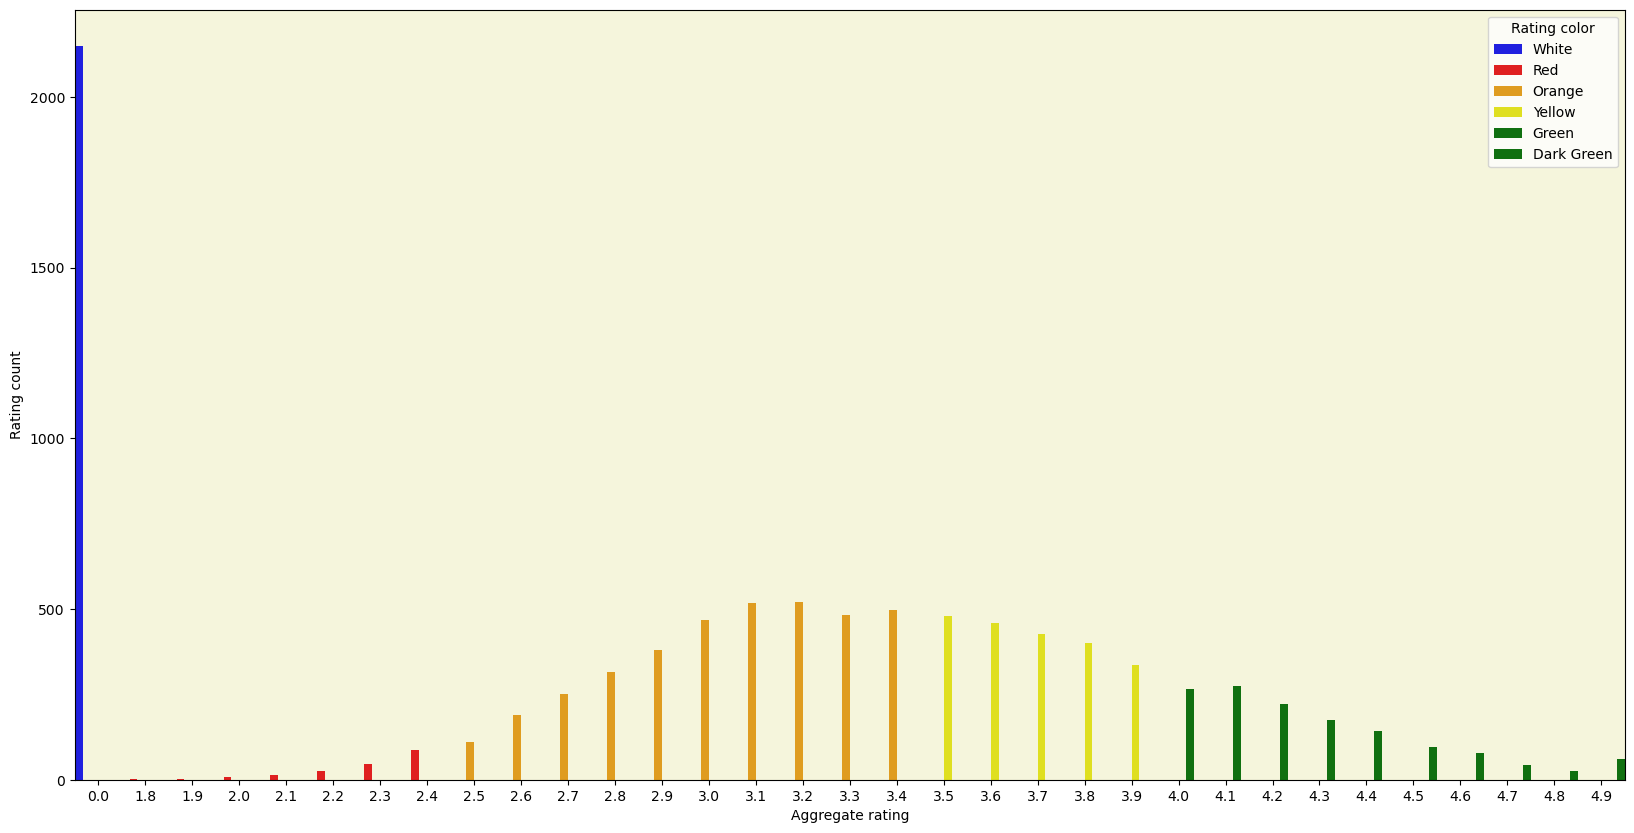

In [124]:
plt.figure(figsize=(20,10))
plt.gca().set_facecolor('#F5F5DC') # changes the background color of the barplot to beige
sns.barplot(x = 'Aggregate rating', y = "Rating count", hue = 'Rating color', data = ratings, palette = ['blue', 'red', 'orange', 'yellow', 'green', 'green'], width = 1)
# the above is the representation of the aggregate ratings w.r.t Rating count

<Axes: xlabel='Rating color', ylabel='count'>

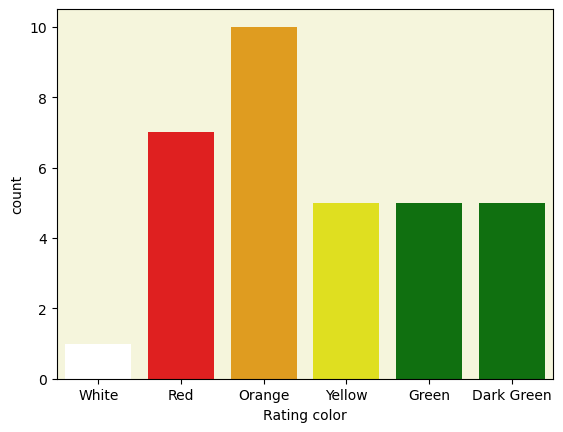

In [125]:
plt.gca().set_facecolor('#F5F5DC')
sns.countplot(x = "Rating color", data = ratings, palette = ['white', 'red', 'orange', 'yellow', 'green', 'green'])
# count in the Y axis is not rating count, it is like frequency of rating.

In [126]:
# to check which country has the highest amount of 0.0 ratings
final_df[final_df['Aggregate rating']==0.0]['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [127]:
# to check what currency is being used in which countries
final_df.groupby(['Currency', 'Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [128]:
# to check which countries have online delivery
final_df[final_df['Has Online delivery']=='Yes']['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [129]:
# to check which are the top 10 cuisines.
top_cuisines = final_df['Cuisines'].value_counts().reset_index()
top_cuisines.head(10)

,index,Cuisines
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149
